# Modeling and Simulation in Python

### Audrey Lee

Copyright 2017 Allen Downey

License: [Creative Commons Attribution 4.0 International](https://creativecommons.org/licenses/by/4.0)


In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

### Model of Earth orbiting the Sun

In [2]:
# Here are the units we'll need

s = UNITS.second
N = UNITS.newton
kg = UNITS.kilogram
m = UNITS.meter
year = UNITS.year

<Unit('year')>

In [3]:
# And an inition condition (with everything in SI units)

r_0 = Vector(147e9,0) * m
v_0 = Vector(-30330,-7500) * m/s

init = State(x= r_0.x,y=r_0.y, vx= v_0.x ,vy= v_0.y)

,values
x,147000000000.0 meter
y,0.0 meter
vx,-30330.0 meter / second
vy,-7500.0 meter / second


In [4]:
# Making a system object

r_earth = 6.371e6 * m
r_sun = 695.508e6 * m
t_end=1 * year

system = System(init=init,
                G=6.674e-11 * N / kg**2 * m**2,
                m1=1.989e30 * kg,
                m2=5.972e24 * kg,
                t_0=0 * s,
                t_end=t_end.to(s))

,values
init,x 147000000000.0 meter y ...
G,6.674e-11 meter ** 2 * newton / kilogram ** 2
m1,1.989e+30 kilogram
m2,5.972e+24 kilogram
t_0,0 second
t_end,31556925.9747 second


In [5]:
# Here's a function that computes the force of gravity

def universal_gravitation(state, system):
    """Computes gravitational force.
    
    state: State object with distance r
    system: System object with m1, m2, and G
    """
    x, y, vx, vy = state
    unpack(system)
    direction= Vector(-x,-y) *m
    force = (G * m1 * m2 )/ (x**2 + y**2)
    gravity = force * direction.hat()
    
    return gravity

In [6]:
universal_gravitation(init, system)

<Quantity([-3.6686486e+22 -0.0000000e+00], 'newton')>

In [7]:
# The slope function

def slope_func(state, t, system):
    """Compute derivatives of the state.
    
    state: position, velocity
    t: time
    system: System object containing `g`
    
    returns: derivatives of y and v
    """
    x, y, vx, vy = state
    unpack(system)    
    
    r= Vector(x,y)
    v = Vector(vx, vy)
    
    force = Vector(universal_gravitation(state, system))

    drdt = v
    dvdt = force / m2
    
    return drdt.x, drdt.y, dvdt.x, dvdt.y

In [8]:
# Always test the slope function!

slope_func(init, 0, system)

(<Quantity(-30330.0, 'meter / second')>,
 <Quantity(-7500.0, 'meter / second')>,
 <Quantity(-0.006143082049146188, 'newton / kilogram')>,
 <Quantity(-0.0, 'newton / kilogram')>)

In [9]:
# Here's an event function that stops the simulation
# before the collision

'''def event_func(state, t, system):
    r, v = state
    return r - system.r_final'''

'def event_func(state, t, system):\n    r, v = state\n    return r - system.r_final'

In [10]:
# Always test the event function!

#event_func(init, 0, system)

In [11]:
# Finally we can run the simulation

results, details = run_ode_solver(system, slope_func)
details

,values
sol,None
t_events,[]
nfev,302
njev,0
nlu,0
status,0
message,The solver successfully reached the end of the...
success,True


In [12]:
# Here's how long it takes...

t_final = get_last_label(results) * s

<Quantity(31556925.9747, 'second')>

In [13]:
# ... expressed in units we understand

t_final.to(UNITS.day)

<Quantity(365.24219878124995, 'day')>

In [14]:
# Before plotting, we run the simulation again with `t_eval`

ts = linspace(t_0, t_final, 201)
#results, details = run_ode_solver(system, slope_func, events=event_func, t_eval=ts)
results, details = run_ode_solver(system, slope_func, t_eval=ts, method='RK23')

In [15]:
# Scaling the time steps to days

results.index /= 60 * 60 * 24

In [16]:
# Scaling the distance to million km

x = results.x / 1e9
y = results.y / 1e9;

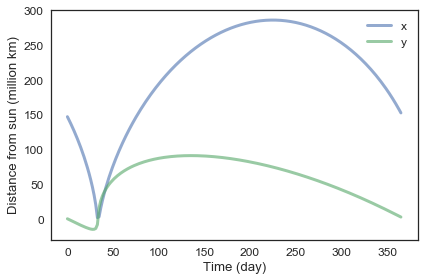

In [17]:
# And plotting

plot(x, label='x')
plot(y, label='y')

decorate(xlabel='Time (day)',
         ylabel='Distance from sun (million km)')

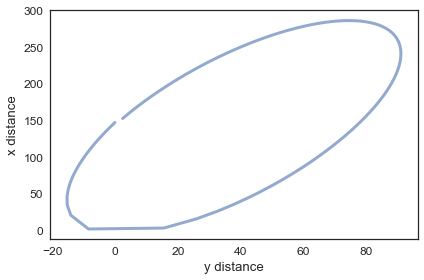

In [18]:
plot(y,x)
decorate(xlabel='y distance', ylabel='x distance')

In [19]:
%psource solve_ivp